<a href="https://colab.research.google.com/github/FatimaHAbubakar/DS-AICourse/blob/Shakespeare-AI-lab/Shakespeare_GenerativeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total words: 28959
Vocabulary size: 4187
love did i will go but sworn but kill me and his own fortune by and do remember it presently took ifaith wisely nurse look up
Real top words: [('the', 876), ('and', 803), ('to', 623), ('i', 580), ('a', 542), ('of', 518), ('in', 393), ('is', 366), ('you', 362), ('that', 361)]
Generated top words: [('to', 9), ('i', 9), ('a', 7), ('not', 5), ('the', 5), ('in', 5), ('of', 4), ('is', 4), ('and', 3), ('her', 3)]


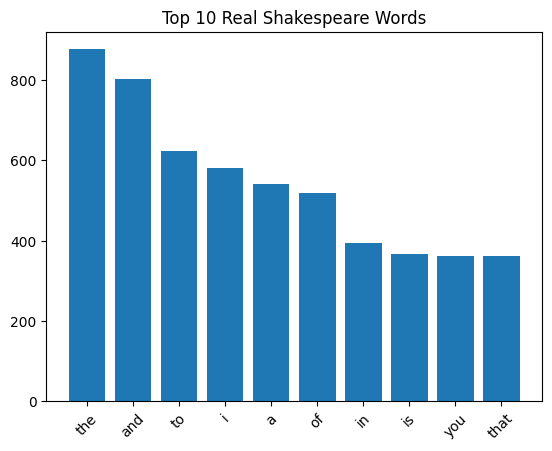

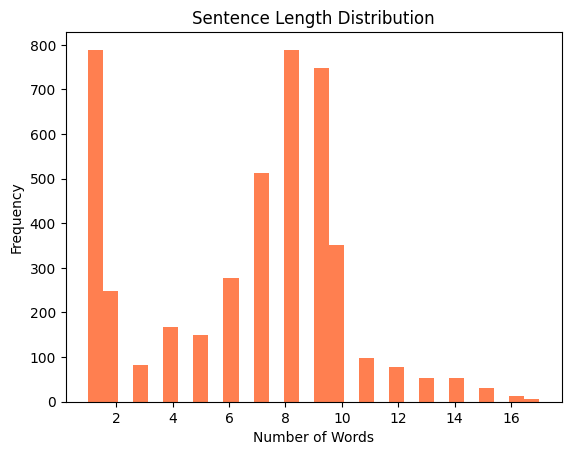

In [13]:
import pandas as pd
import re
from collections import defaultdict, Counter
import random
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/romeo_juliet.csv")
df.head()

# Data cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_line"] = df["line"].apply(clean_text)

full_text = " ".join(df["clean_line"])
words = full_text.split()

print("Total words:", len(words))

# Model Training
bigrams = defaultdict(list)

for i in range(len(words)-1):
    current_word = words[i]
    next_word = words[i+1]
    bigrams[current_word].append(next_word)

print("Vocabulary size:", len(bigrams))

# Text Generation
def generate_text(start_word, length=20):
    word = start_word.lower()
    sentence = [word]

    for _ in range(length):
        if word in bigrams:
            word = random.choice(bigrams[word])
            sentence.append(word)
        else:
            break

    return " ".join(sentence)

print(generate_text("love", 25))

# Evaluation, word frequency
real_freq = Counter(words)

generated_text = generate_text("love", 200)
generated_words = generated_text.split()
gen_freq = Counter(generated_words)

print("Real top words:", real_freq.most_common(10))
print("Generated top words:", gen_freq.most_common(10))

#Charts, word frequency chart
top_real = real_freq.most_common(10)
words_real = [w[0] for w in top_real]
counts_real = [w[1] for w in top_real]

plt.figure()
plt.bar(words_real, counts_real)
plt.xticks(rotation=45)
plt.title("Top 10 Real Shakespeare Words")
plt.show()

# sentence length distribution
df["clean_line"] = df["line"].apply(clean_text)
df["sentence_lengths"] = df["clean_line"].apply(lambda x: len(x.split()))

plt.figure()
plt.hist(df["sentence_lengths"], bins=30, color="coral")
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


## Insights

1. The bigram model captures local word transitions.
2. High-frequency words dominate generation.
3. Generated text reflects dataset distribution.
4. The model lacks long-range context.
5. Statistical structure does not imply semantic understanding.
